# Mall Customer
## Unsupervised Learning - Hierarchical Clustering, and KMeans clustering

Dataset contains 200 rows and 5 columns. We have to visualize the data and then we have to do clustering. Here I will use Hierarchical clustering and KMeans clustering.

# **Importing necessary libraries and setting default parameters**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [3]:
plt.rcParams["figure.figsize"] = (8,5)

## **Importing dataset**

In [4]:
df = pd.read_csv("Mall_Customers.csv")

# **Exploratoring Data**

In [5]:
df.shape

(200, 5)

In [6]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### No null values detected

In [8]:
for i in df.columns:
    print( i, len( df[df[i] == 0] ) )

CustomerID 0
Genre 0
Age 0
Annual Income (k$) 0
Spending Score (1-100) 0


#### No zeros detected in our dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### All columns have correct Dtype

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **Plotting some graphs**

<function matplotlib.pyplot.show(close=None, block=None)>

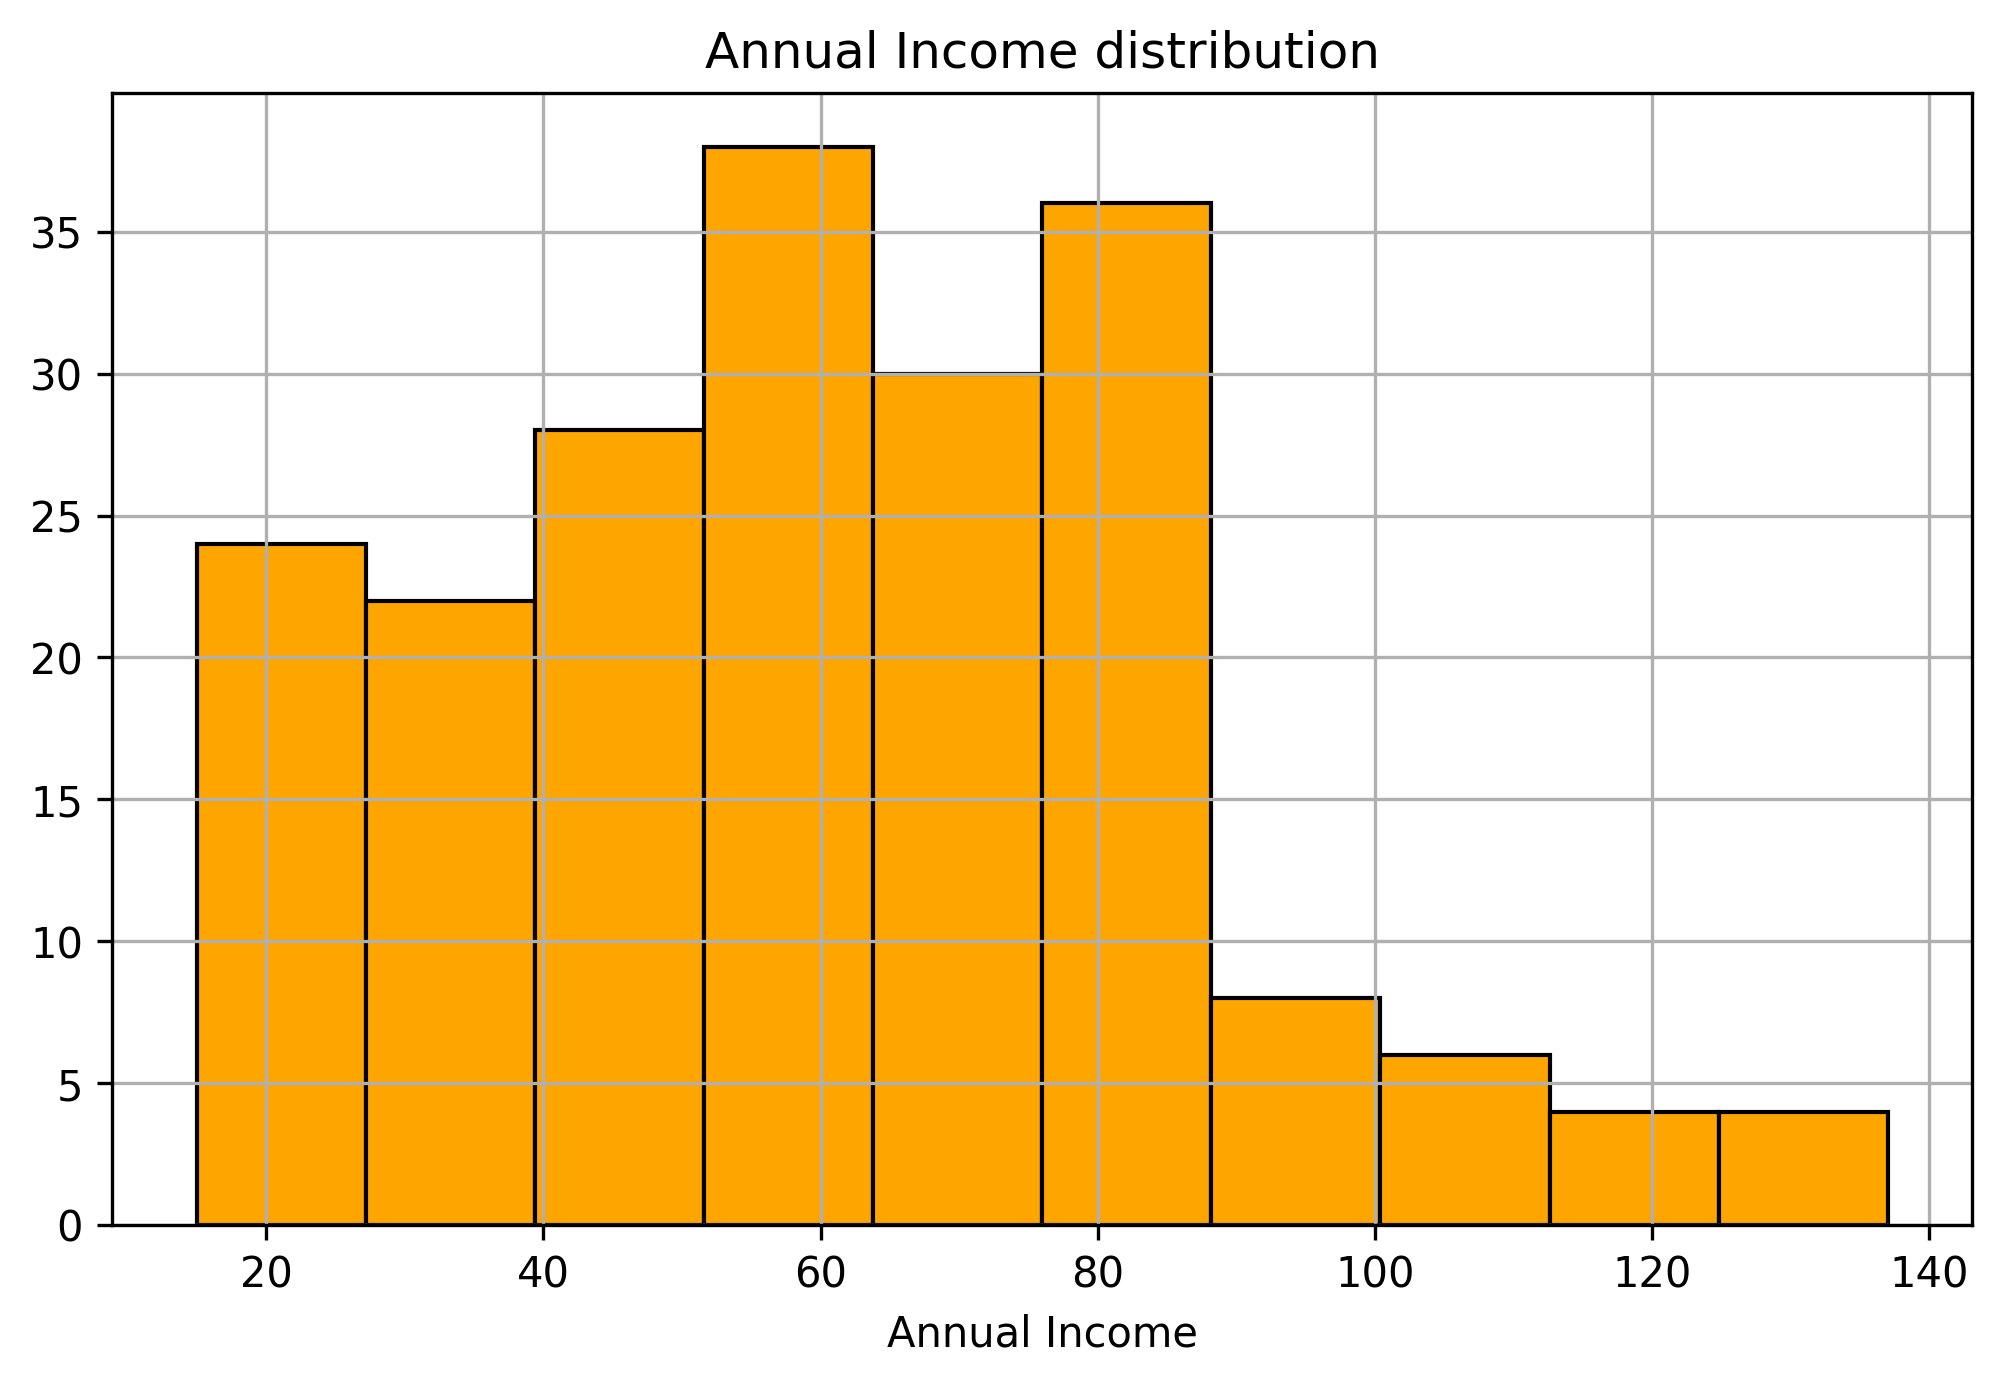

In [11]:
plt.plot(figsize=(8,5))
plt.hist(df["Annual Income (k$)"], color='orange', edgecolor='k')
plt.title("Annual Income distribution")
plt.xlabel("Annual Income")
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

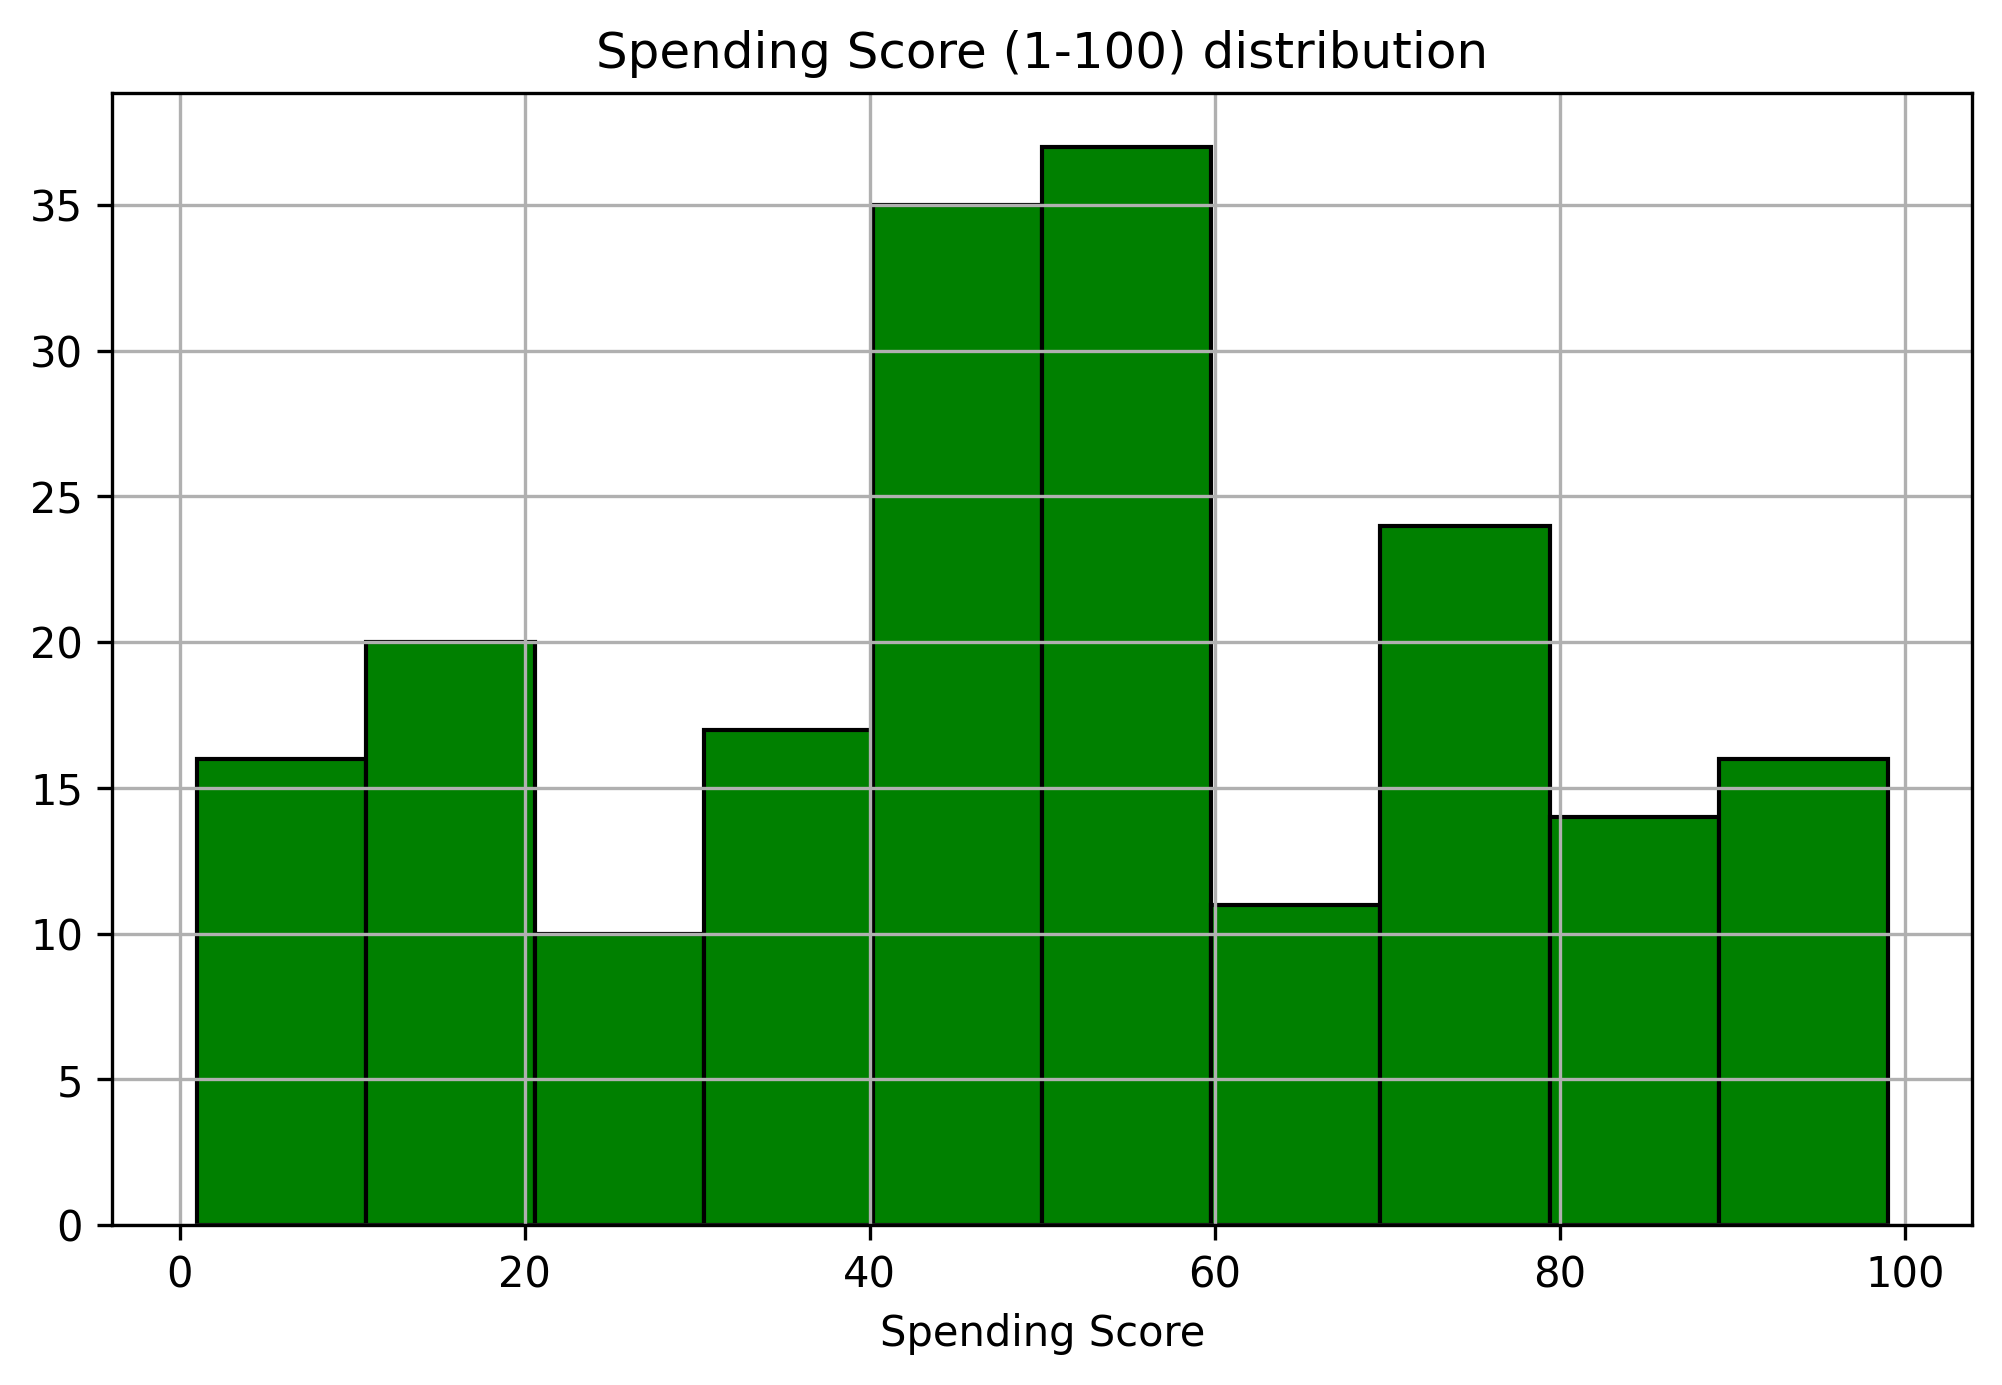

In [12]:
plt.plot(figsize=(8,5))
plt.hist(df["Spending Score (1-100)"], color='green', edgecolor='k')
plt.title("Spending Score (1-100) distribution")
plt.xlabel("Spending Score")
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

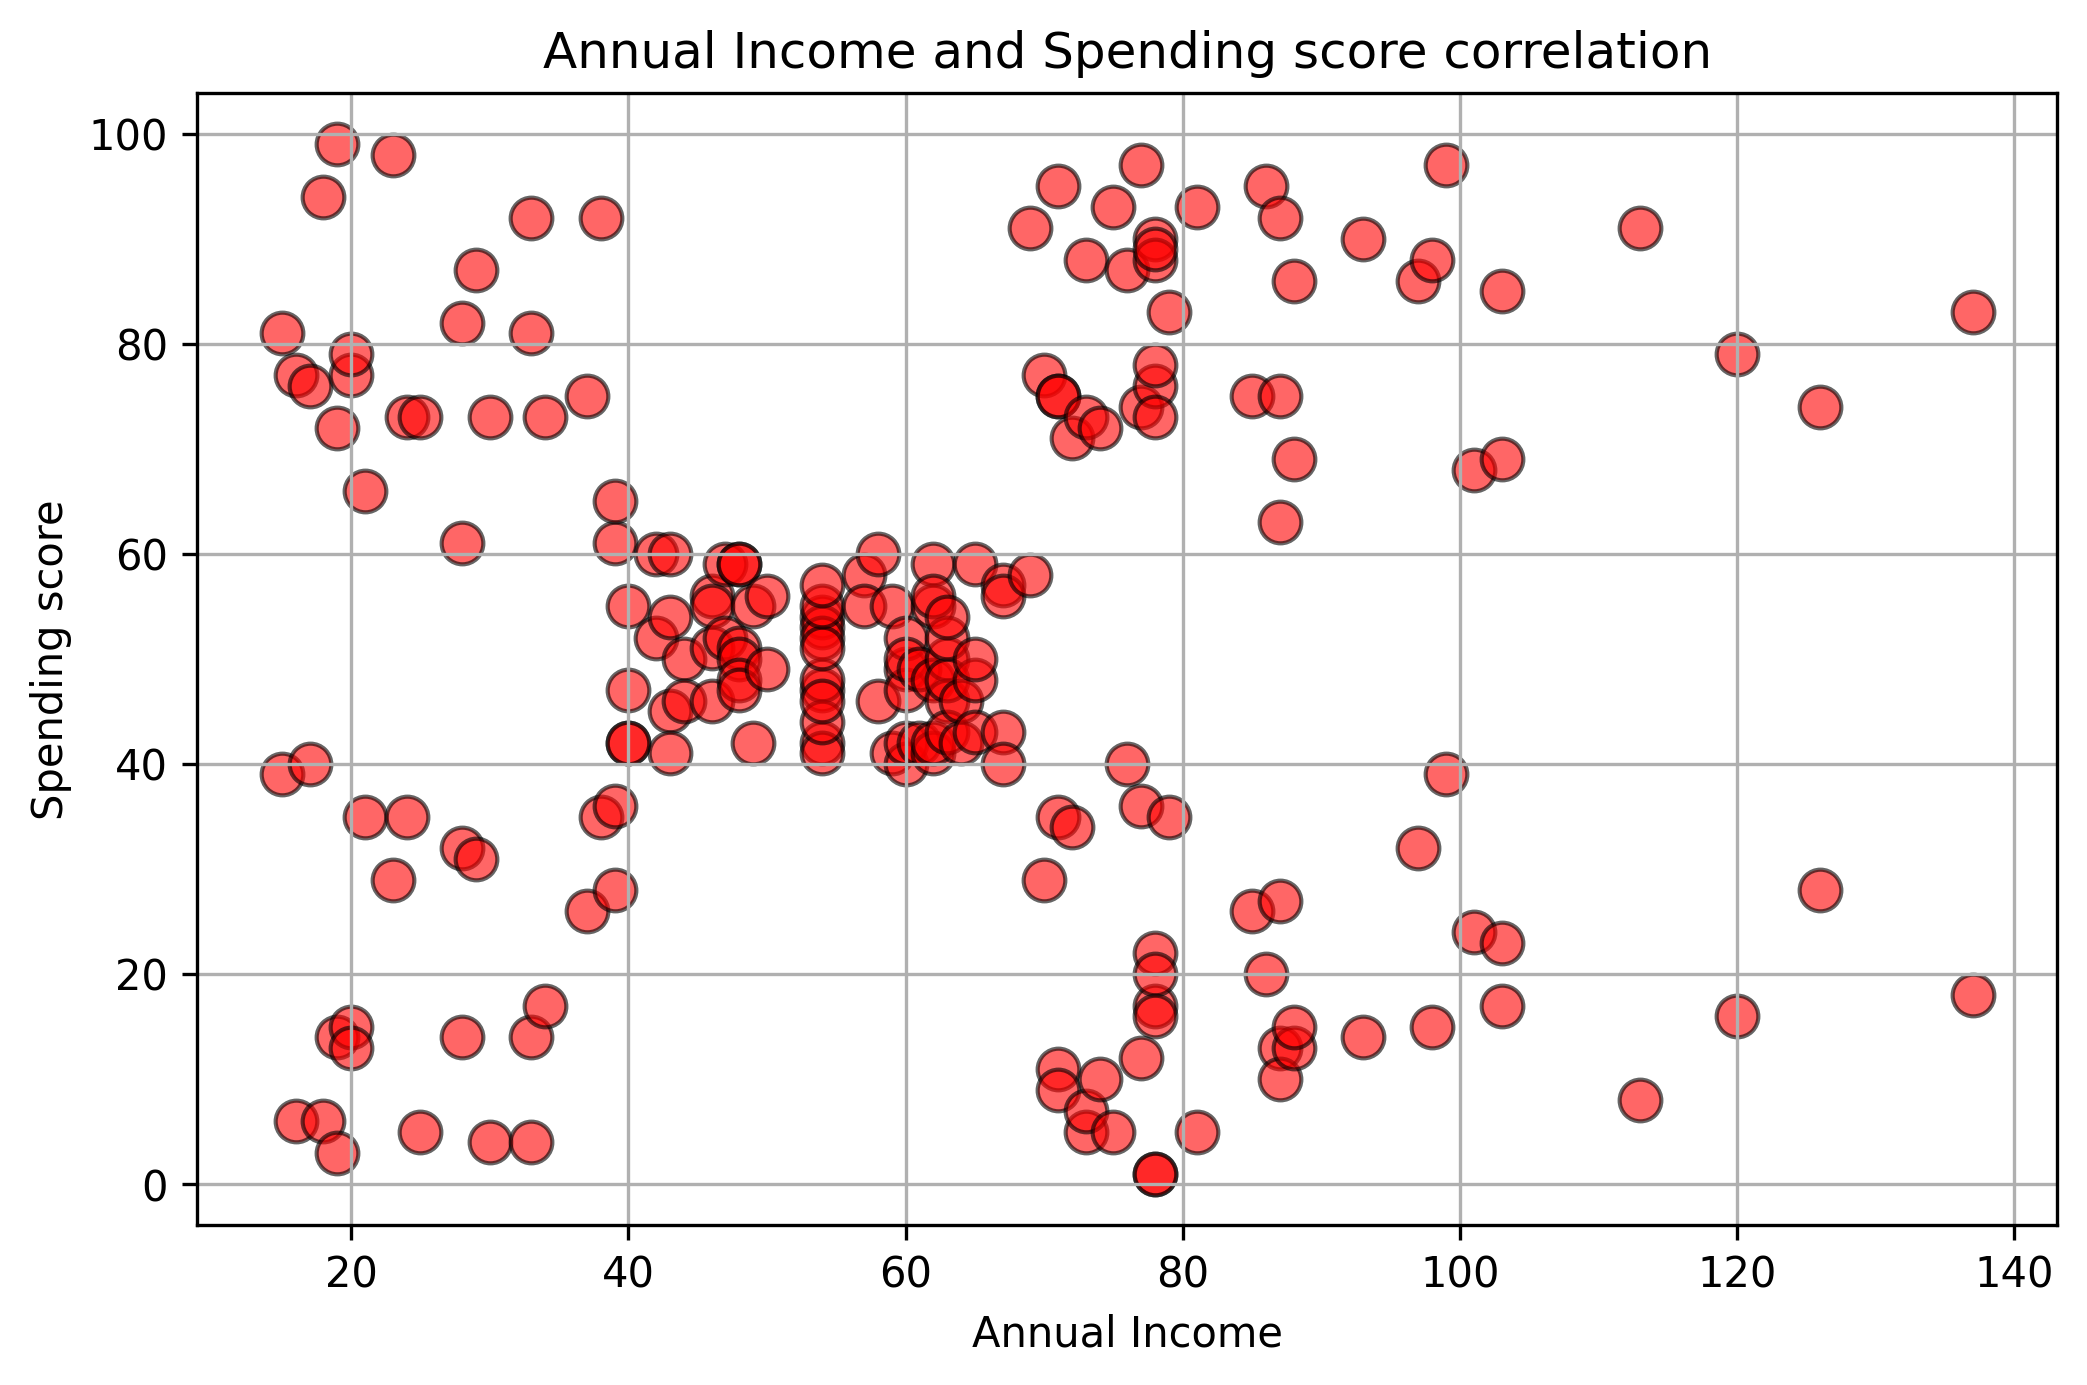

In [13]:
plt.plot(figsize=(8,5))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], color='red', edgecolor='k', alpha=0.6, s=100)
plt.title("Annual Income and Spending score correlation")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.grid(True)
plt.show

### There is no correlation between Spending score and Annual income

<function matplotlib.pyplot.show(close=None, block=None)>

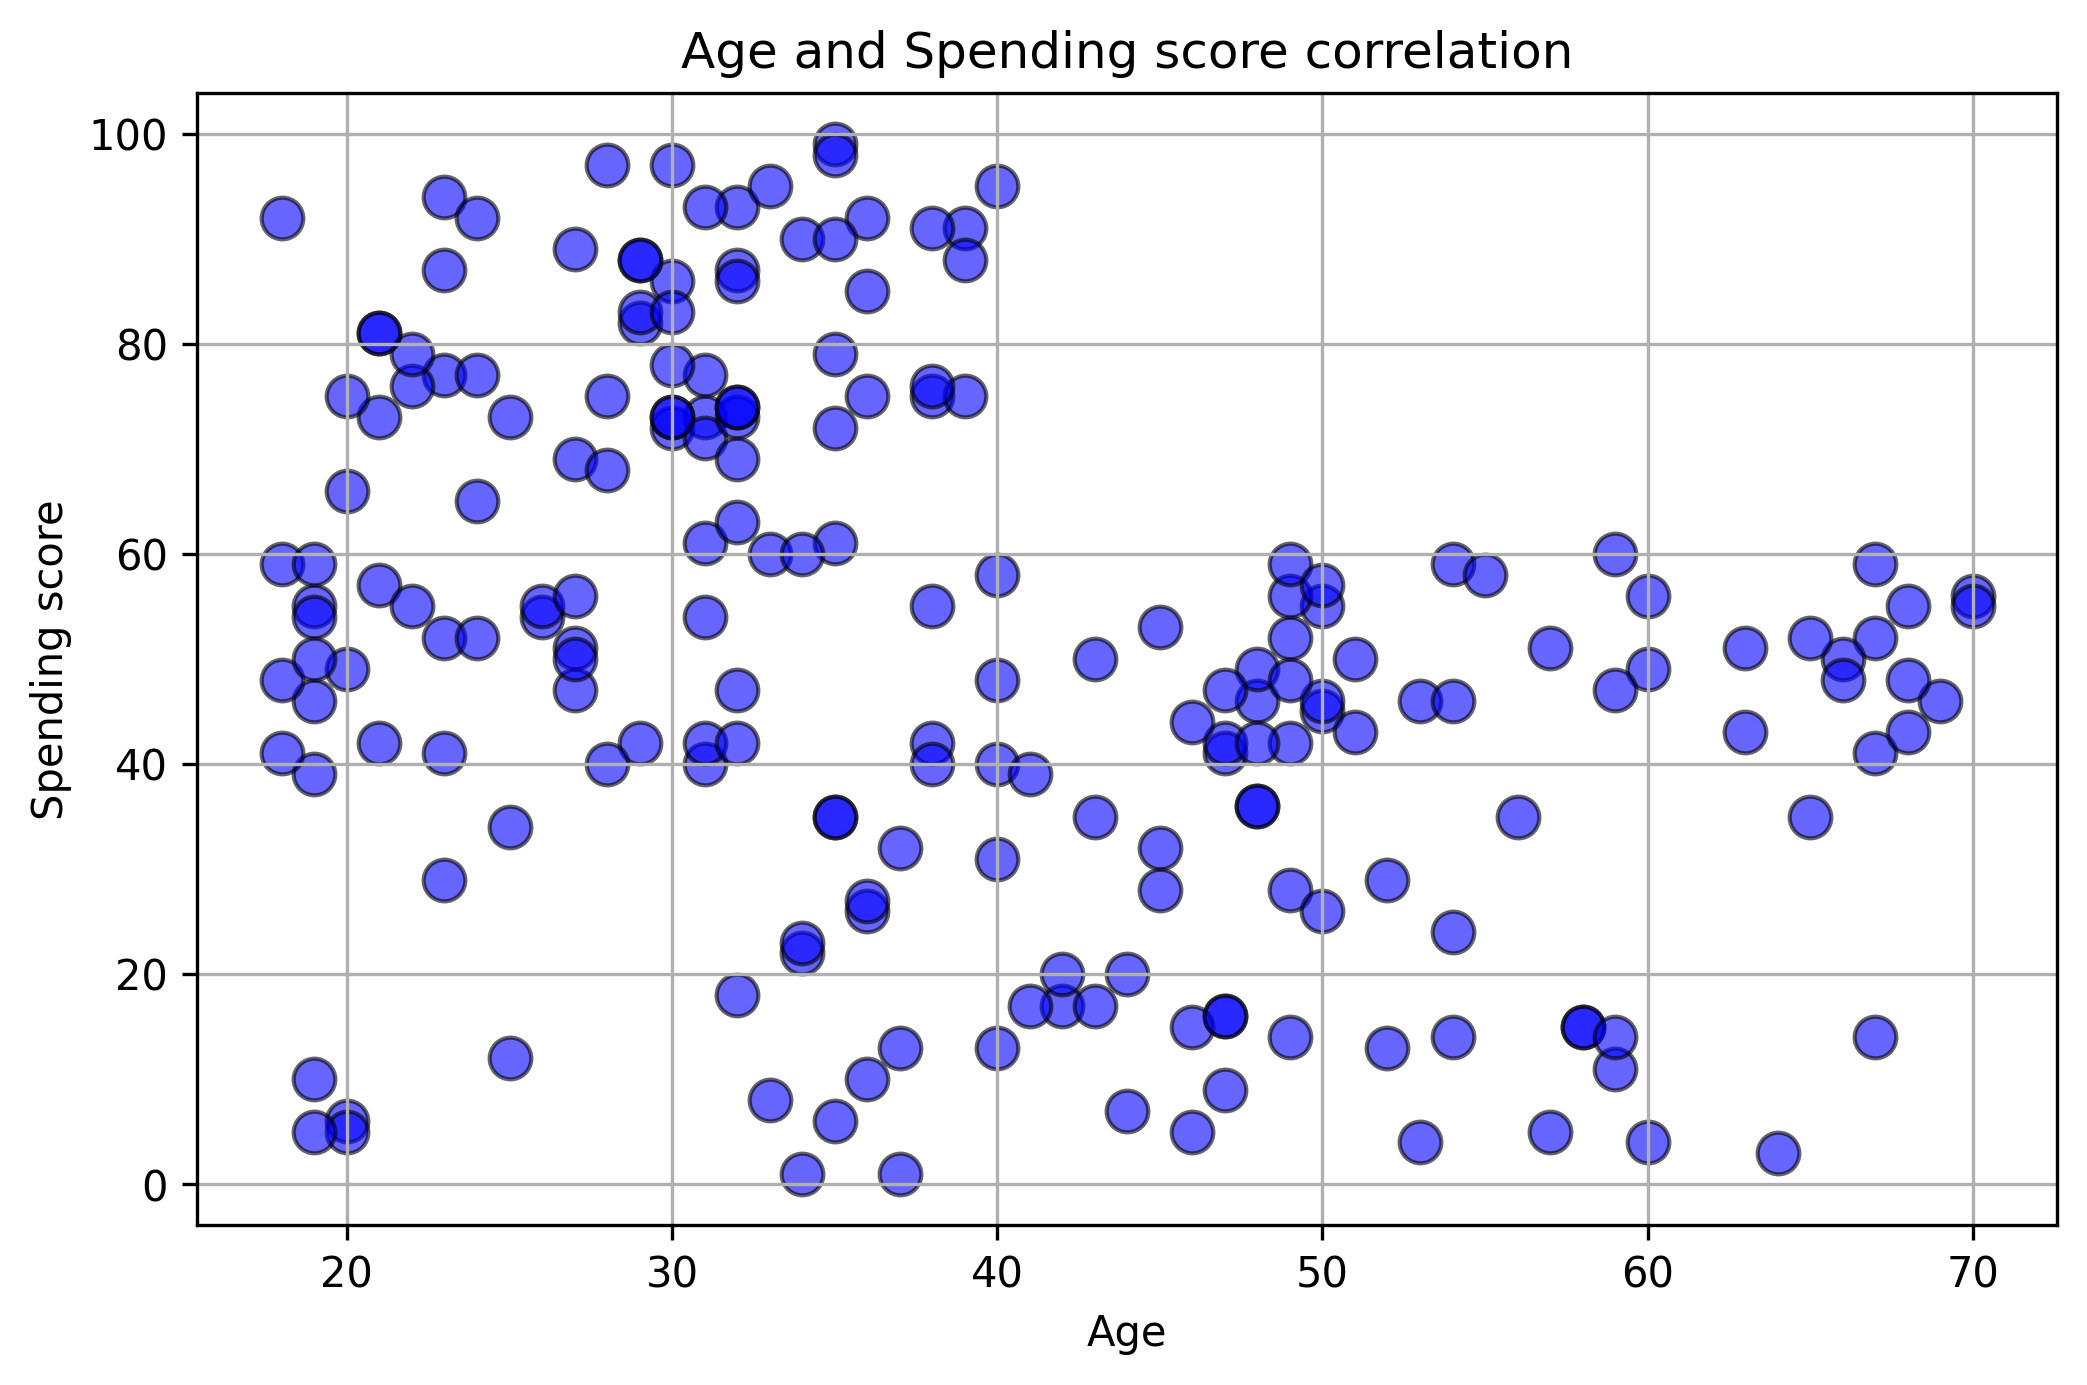

In [14]:
plt.plot(figsize=(8,5))
plt.scatter(df["Age"], df["Spending Score (1-100)"], color='blue', edgecolor='k', alpha=0.6, s=100)
plt.title("Age and Spending score correlation")
plt.xlabel("Age")
plt.ylabel("Spending score")
plt.grid(True)
plt.show

### There is no correlation between Age and spending score

# **Strategy for clustering**
### Now we will do clustering based on Annual income and Spending score
### *Agglomerative Hierarchical Clustering*: We have no idea of optimal number of clusters. Hence we will first find number of clusters using dendrogram then we will do Agglomerative Heirarchical clustering. 
### *KMeans clustering*: After that, we will check again optimal number of clusters using Elbow method then we will do clustering using K-Means.

In [15]:
X = df.iloc[ : , 3:].values
print(X[:10], "\n\n")
print(X[-10:])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]] 


[[103  23]
 [103  69]
 [113   8]
 [113  91]
 [120  16]
 [120  79]
 [126  28]
 [126  74]
 [137  18]
 [137  83]]


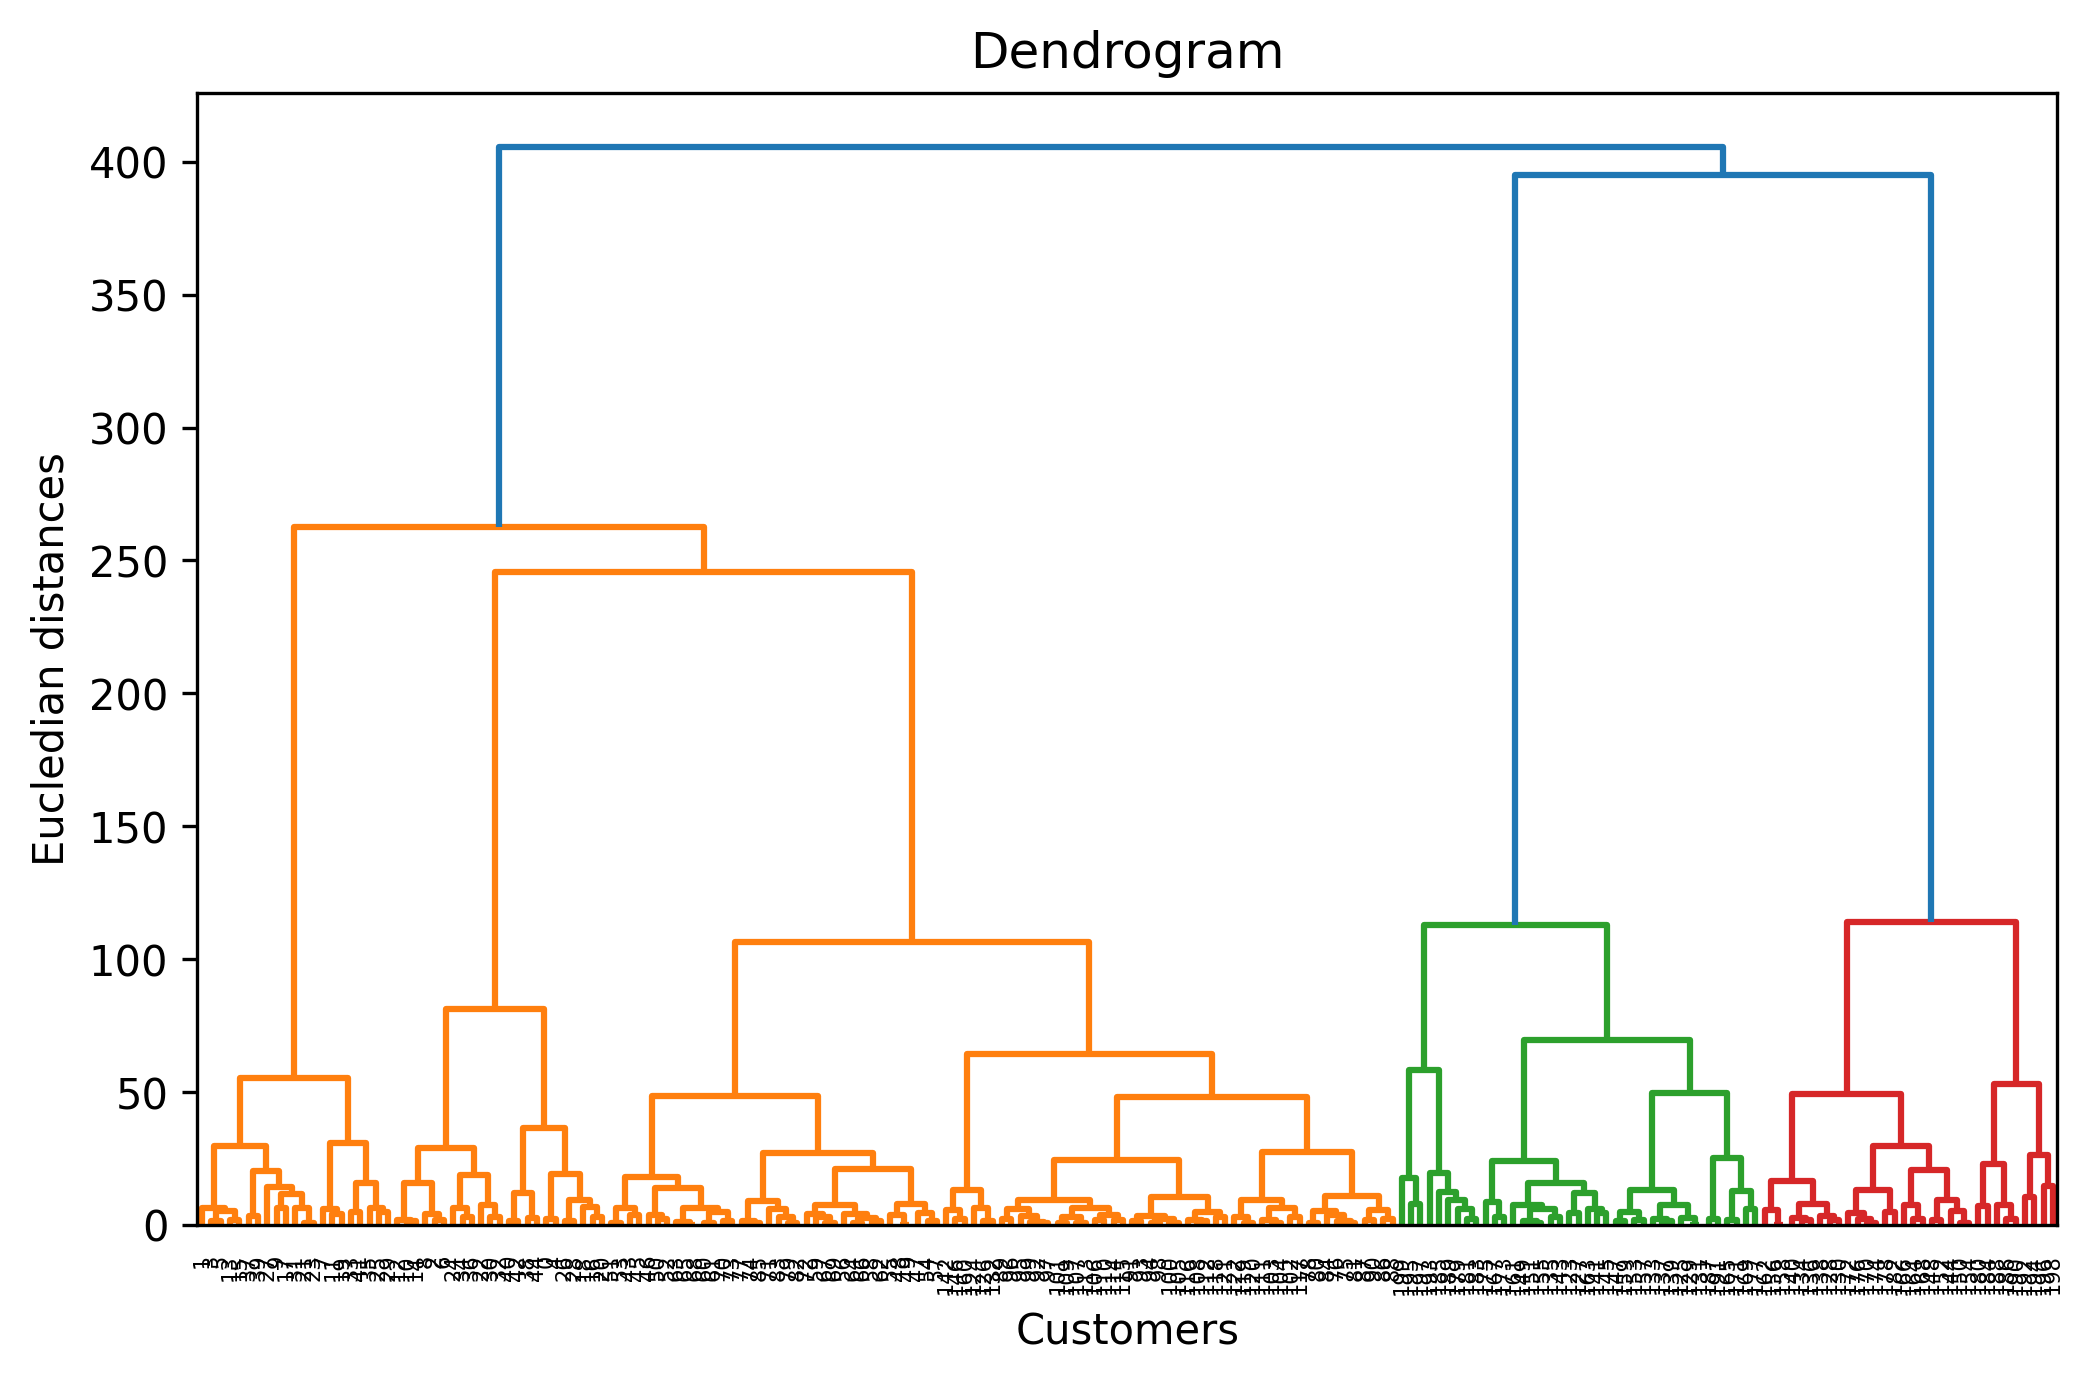

In [16]:
import scipy.cluster.hierarchy as sch

sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledian distances")
plt.show()

# **Optimal number of clusters**
#### Optimal number of cluster can be found by using dendrogram.
#### Just by looking for longest strech of vertical line.
#### Now take any point on the line and draw imaginary horizontal line.
#### Count how many vertical line this imaginary line crossed.
#### That is likely to be optimal number of clusters

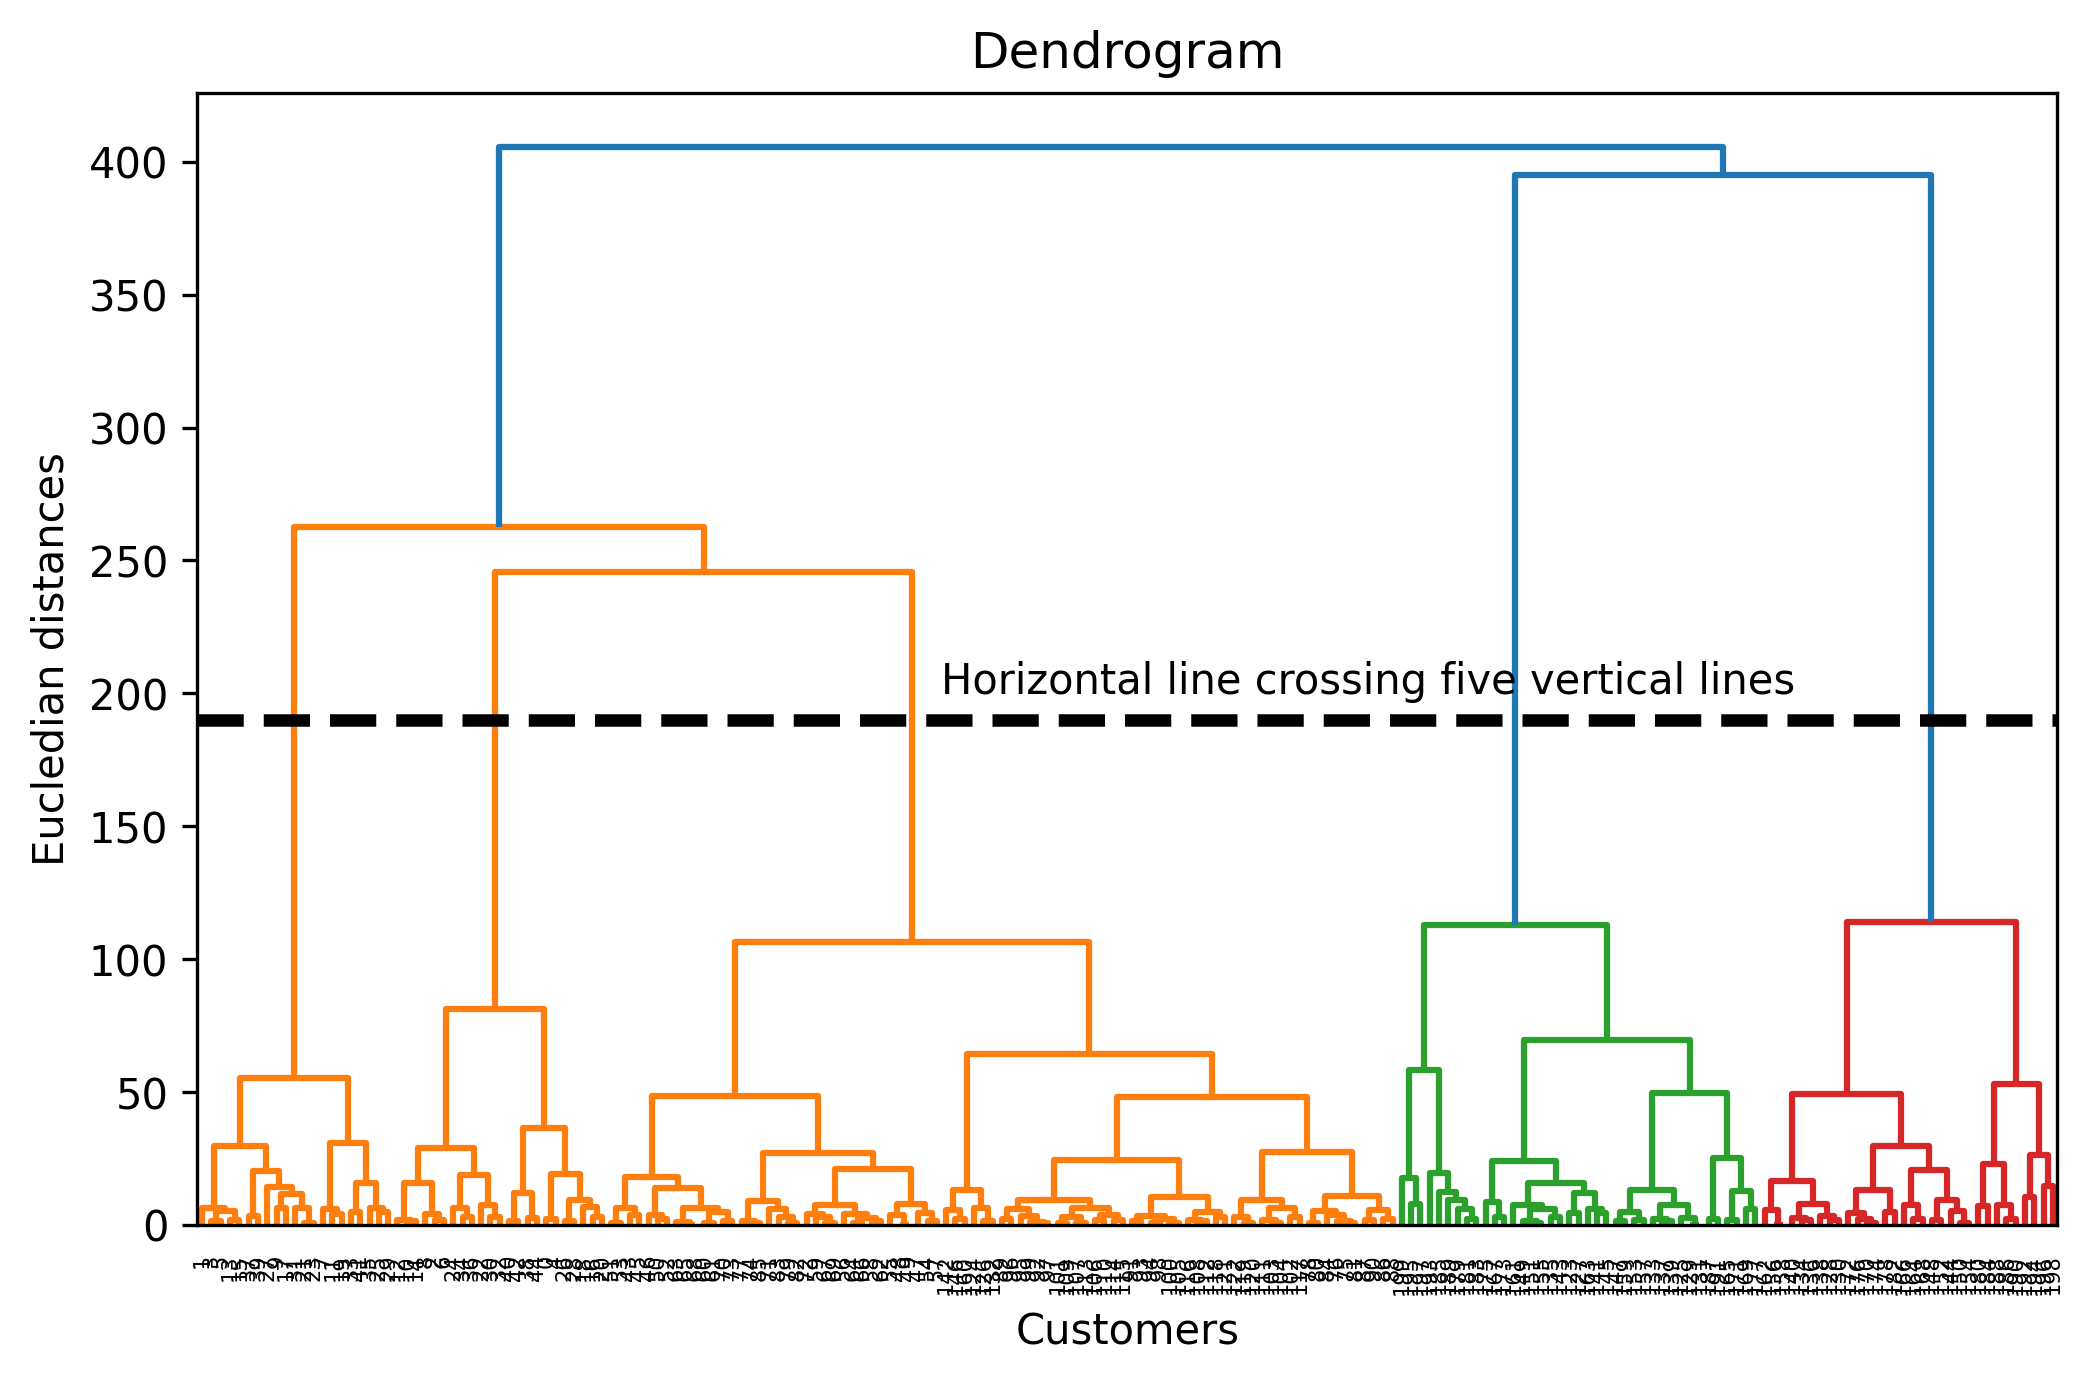

In [17]:
sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledian distances")
plt.hlines(y=190,xmin=0 , xmax=2000, lw=3, linestyles="--", color='black')
plt.text(x=800, y=200, s="Horizontal line crossing five vertical lines", fontsize=10)
plt.show()

#### **Optimal number of clusters = 5**

# **Clustering using Agglomerative Hierarchical Clustering**

In [18]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [19]:
print("X: ", X[:10])
print("\n \n")
print("y_hc: ", y_hc)

X:  [[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]

 

y_hc:  [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


#### *Careful* = High income, low spender --> 0
#### *Standard* = Middle income, middle spender --> 1
#### ***Target group = Middle to high income and high spender*** --> 2
#### Careless = low income but high spender (should be avoided due to credit risk) --> 3
#### Sensible = low income , low spender --> 4

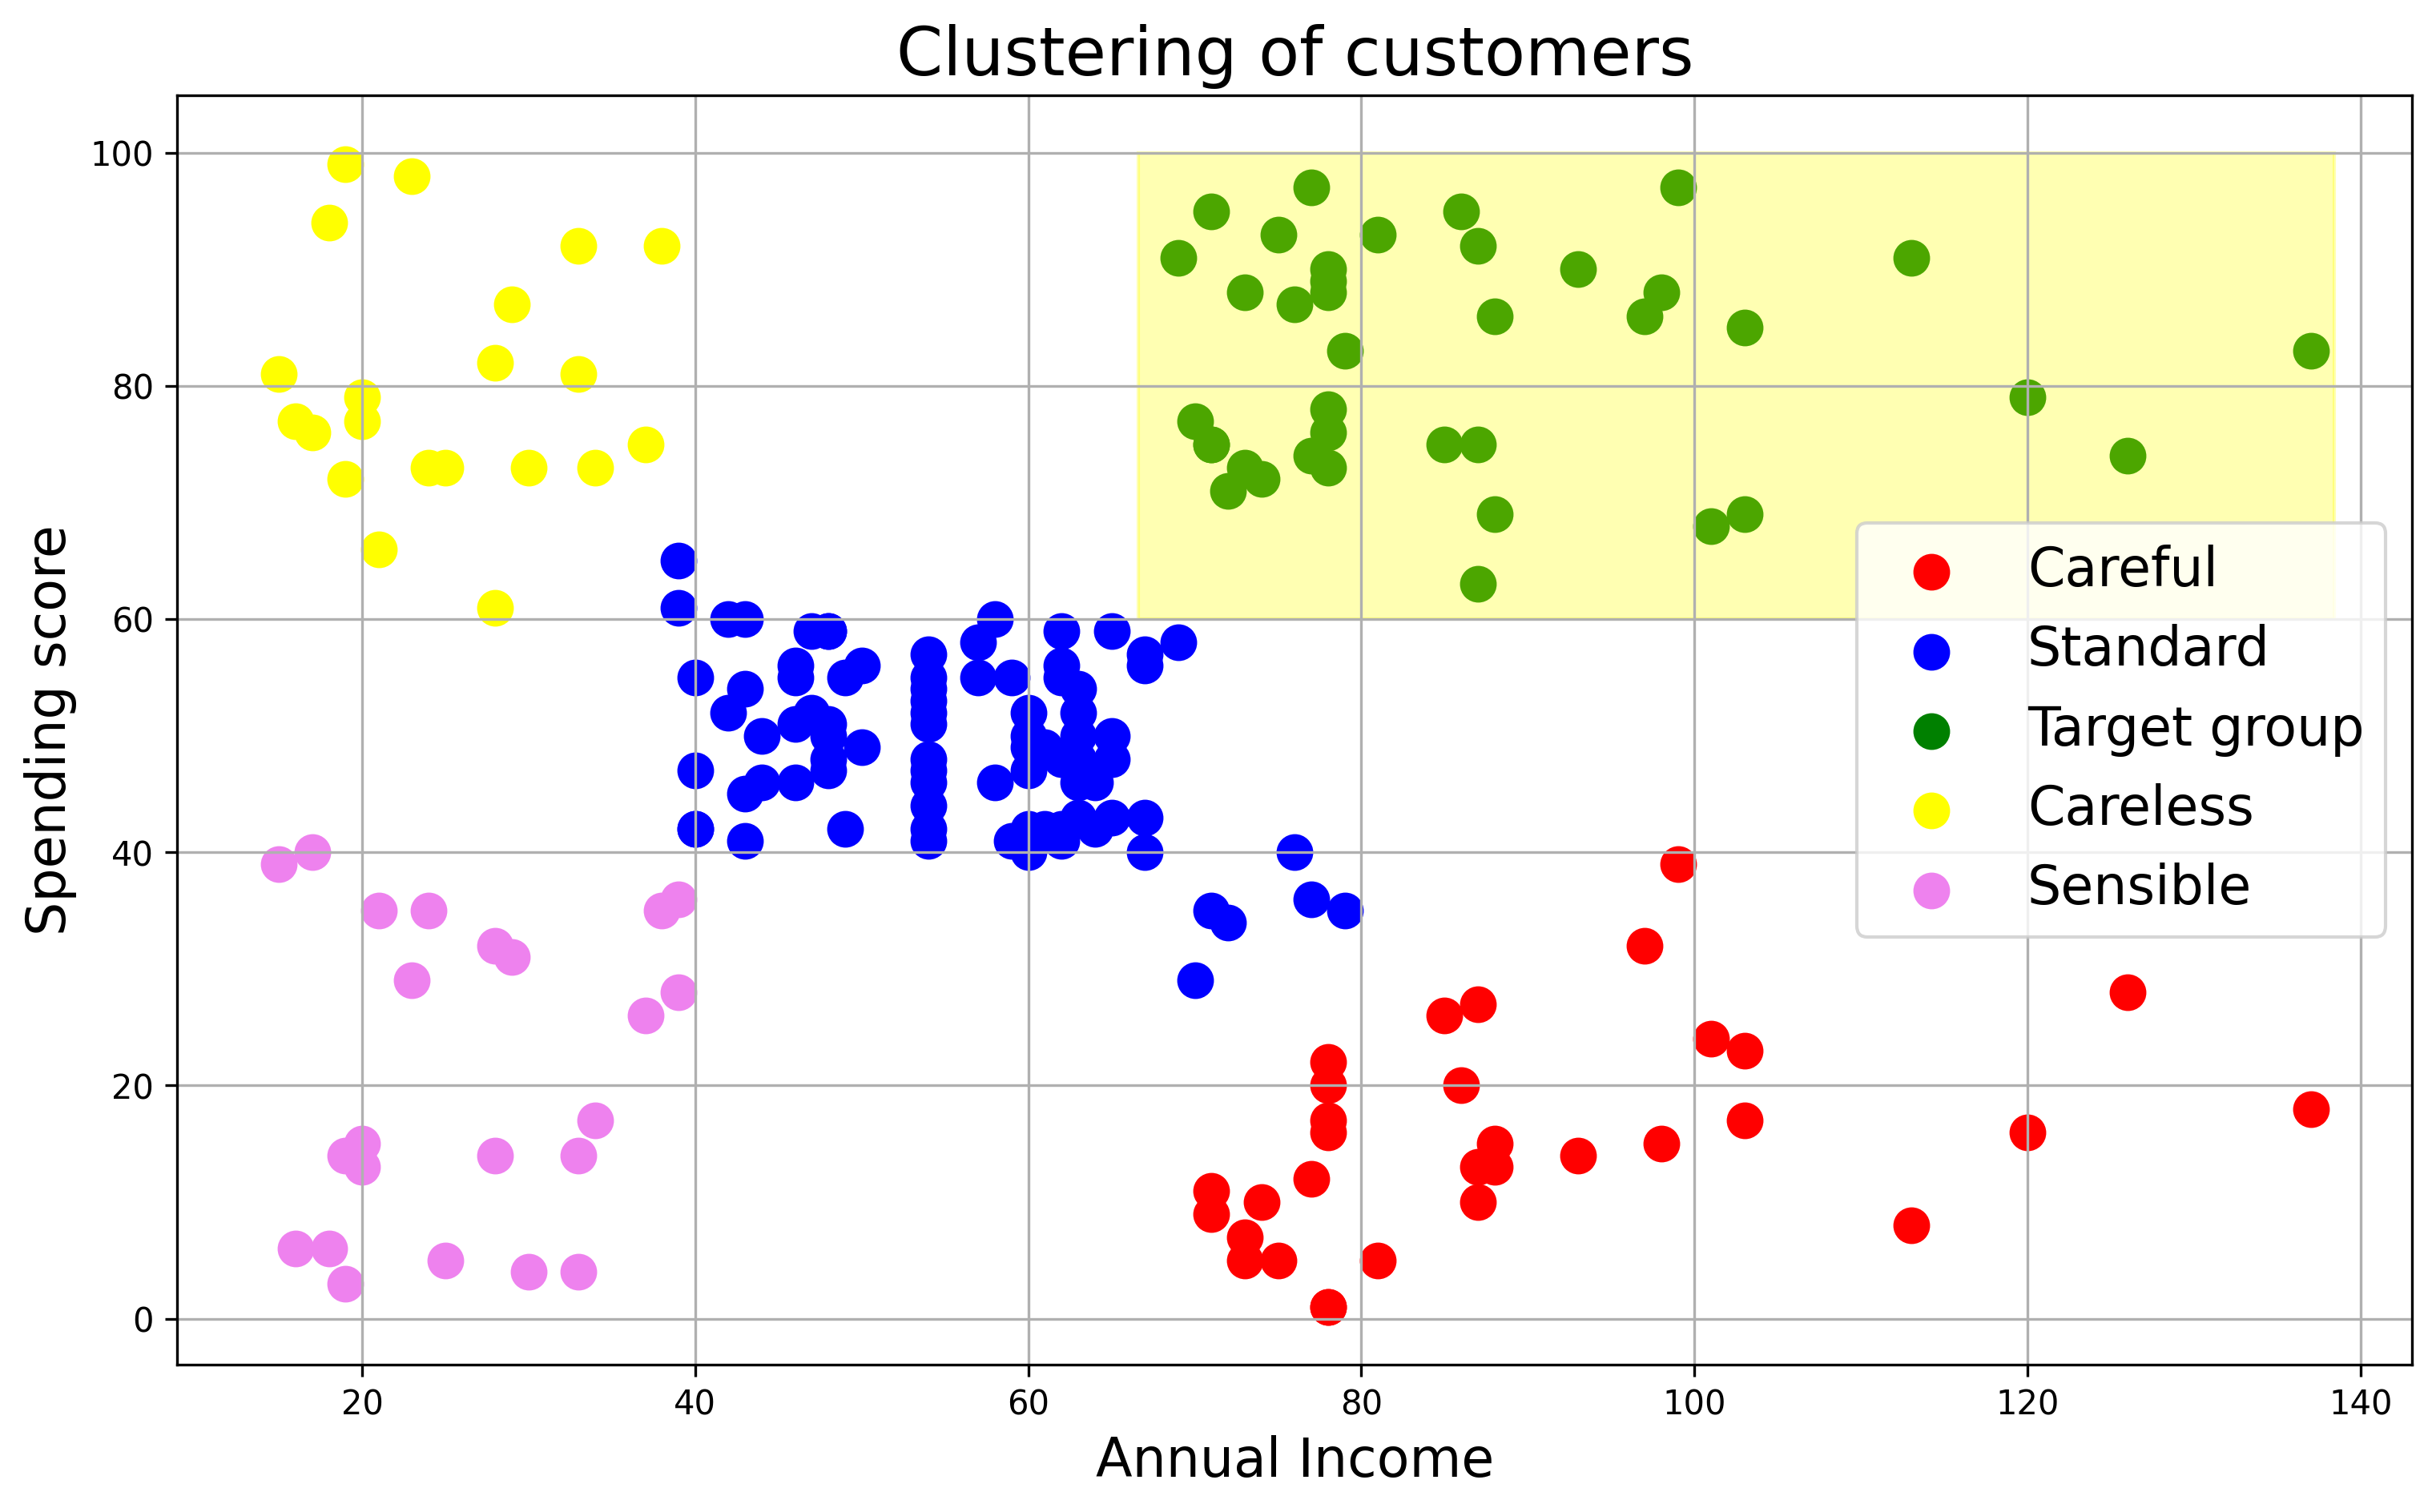

In [20]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='Target group')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='yellow', label='Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='violet', label='Sensible')

plt.title("Clustering of customers", fontsize=20)
plt.xlabel("Annual Income", fontsize=16)
plt.ylabel("Spending score", fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.axhspan(ymin=60, ymax=100, xmin=0.43, xmax=0.965, alpha=0.3, color="yellow")

plt.show()

# **Optimal number of clusters using Elbow Method**
#### Verifying the optimal number of clusters using KMeans algorithm (Elbow method)

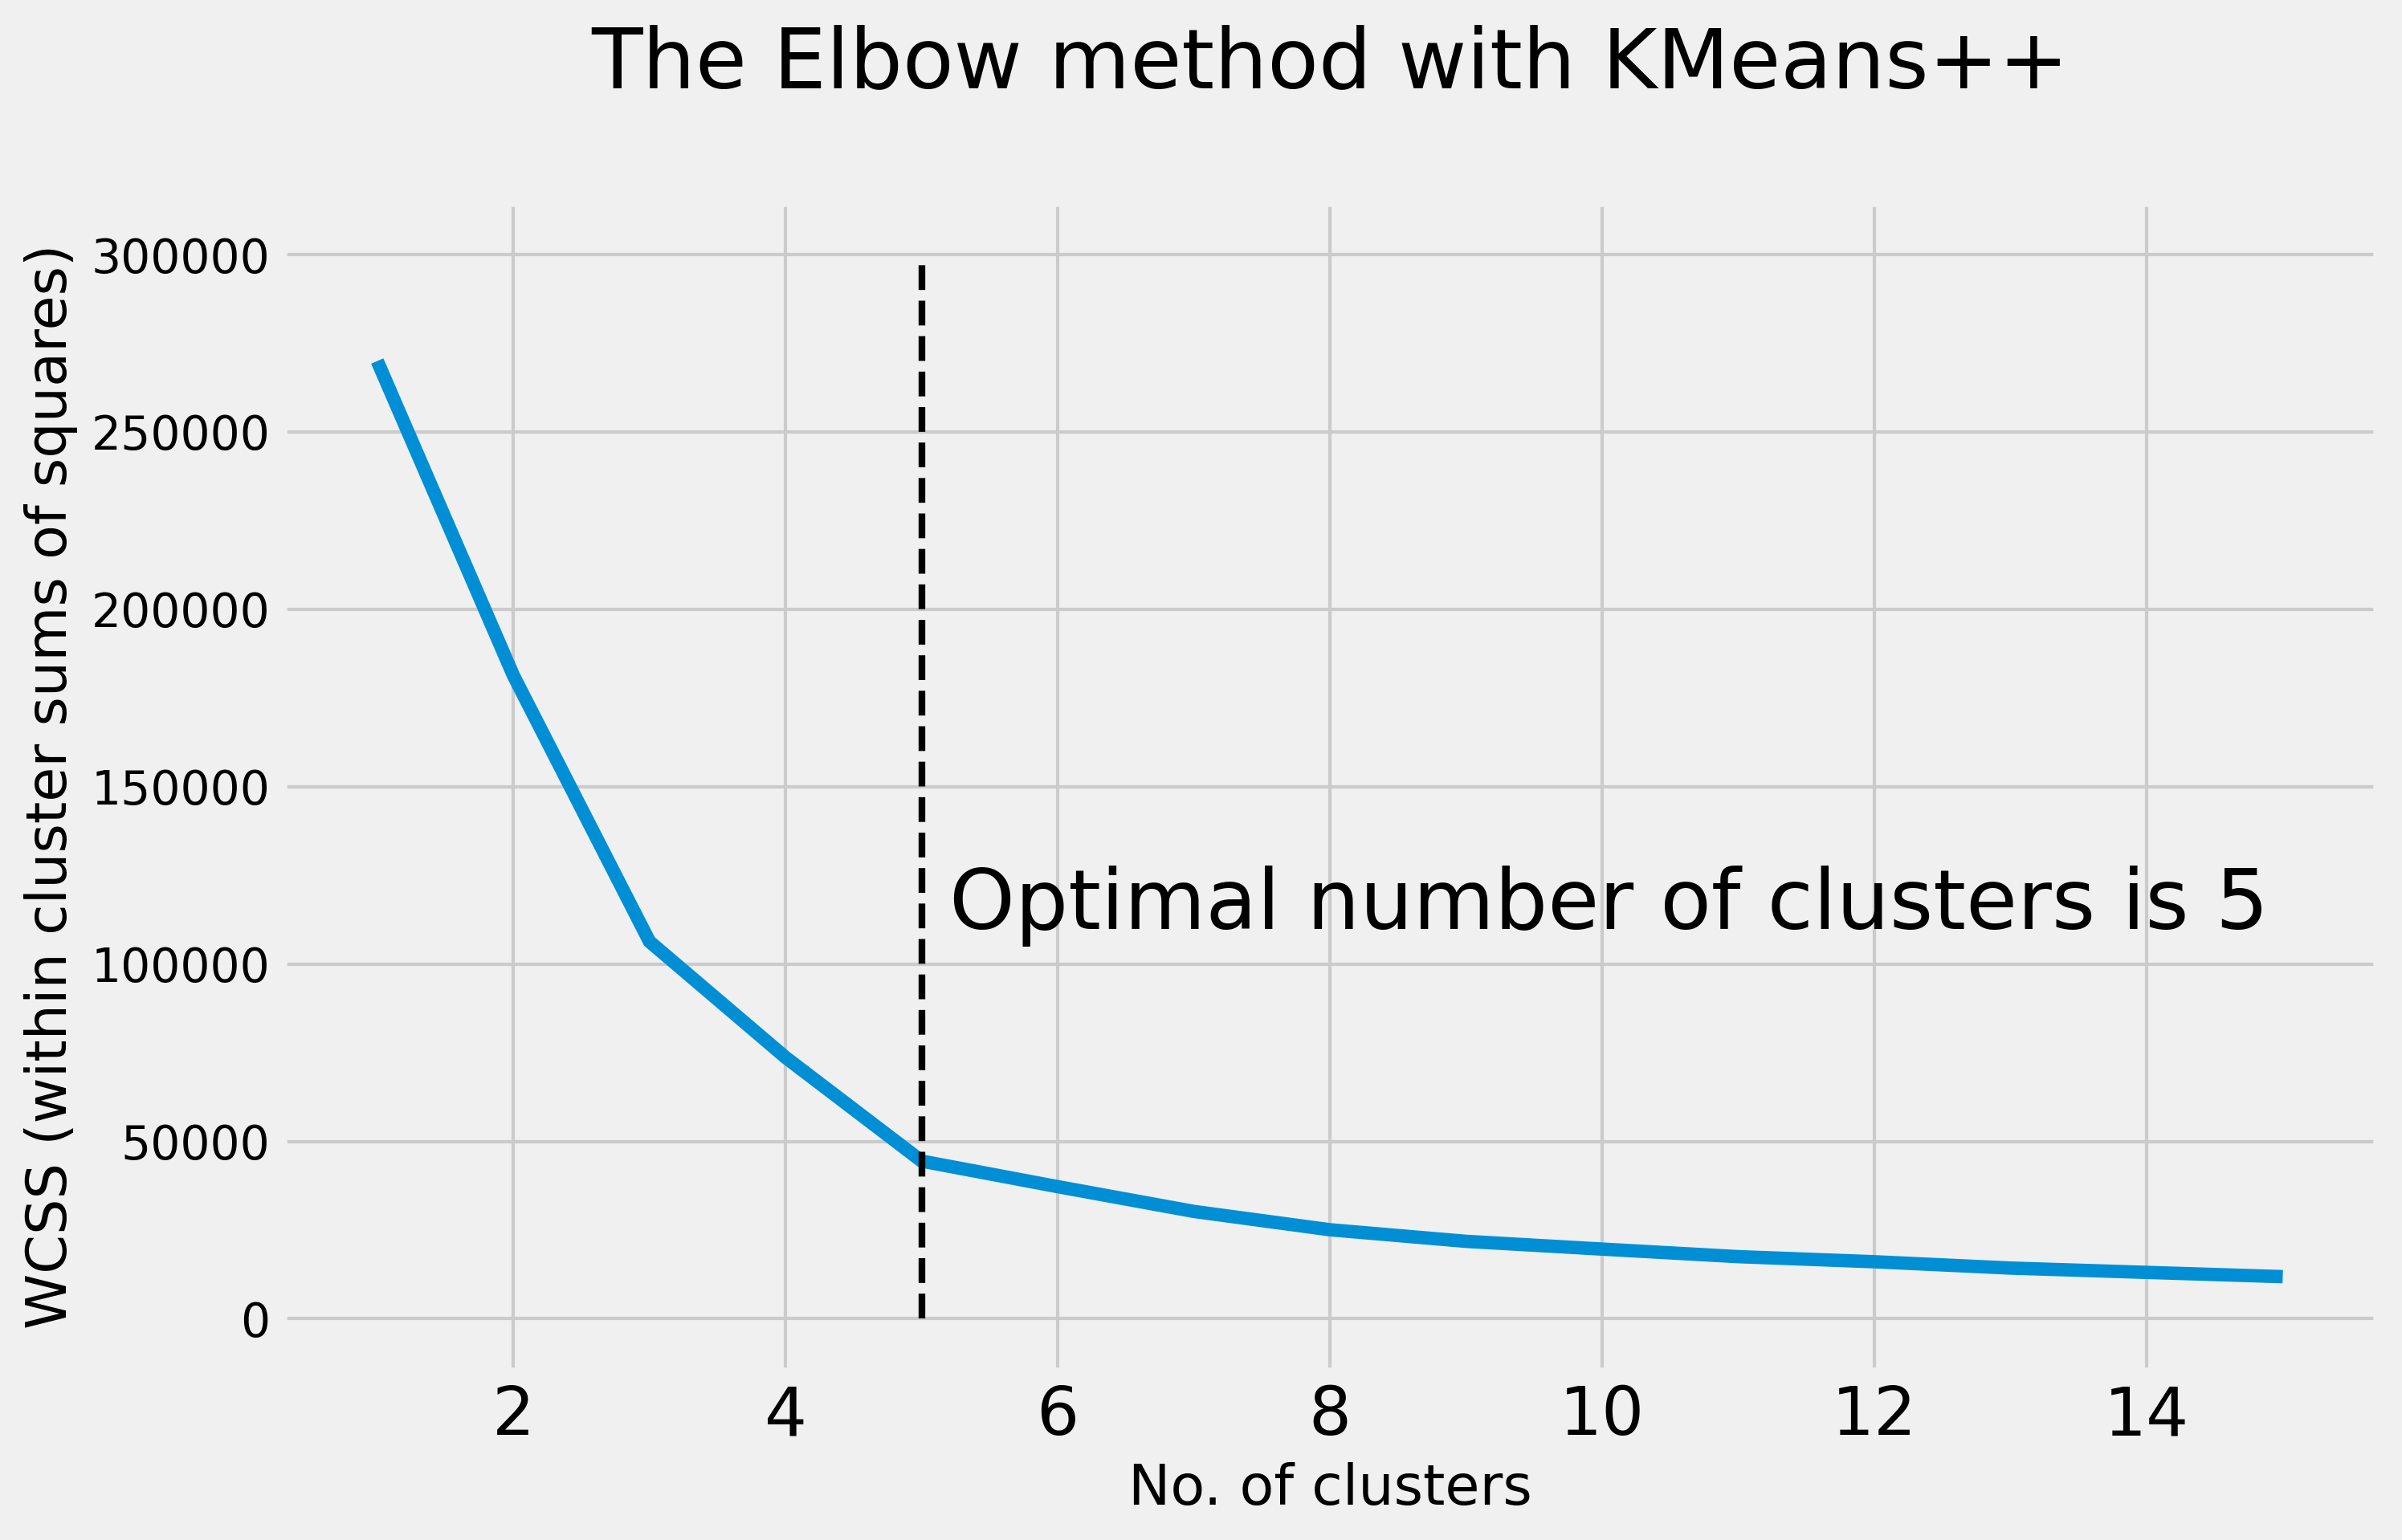

In [21]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

with plt.style.context(('fivethirtyeight')):   #To set background style of plot
    plt.figure(figsize=(10,6))
    plt.plot(range(1,16), wcss)
    plt.title("The Elbow method with KMeans++\n", fontsize=25)
    plt.xlabel("No. of clusters")
    plt.ylabel("WCSS (within cluster sums of squares)")
    plt.xticks(fontsize=20)
    
    plt.vlines(x=5, ymin=0, ymax=300000, linestyle="--", color="black", lw=2)
    
    plt.text(x=5.2, y=110000, s="Optimal number of clusters is 5", fontsize=25)
    
    plt.show()

# **Clustering using KMeans**

#### *Careful* = High income, low spender 
#### *Standard* = Middle income, middle spender 
#### ***Target group = Middle to high income and high spender ***
#### Careless = low income but high spender (should be avoided due to credit risk) 
#### Sensible = low income , low spender 

In [22]:
km = KMeans(n_clusters=5, max_iter=100)
km.fit(X)
y_km = km.fit_predict(X)

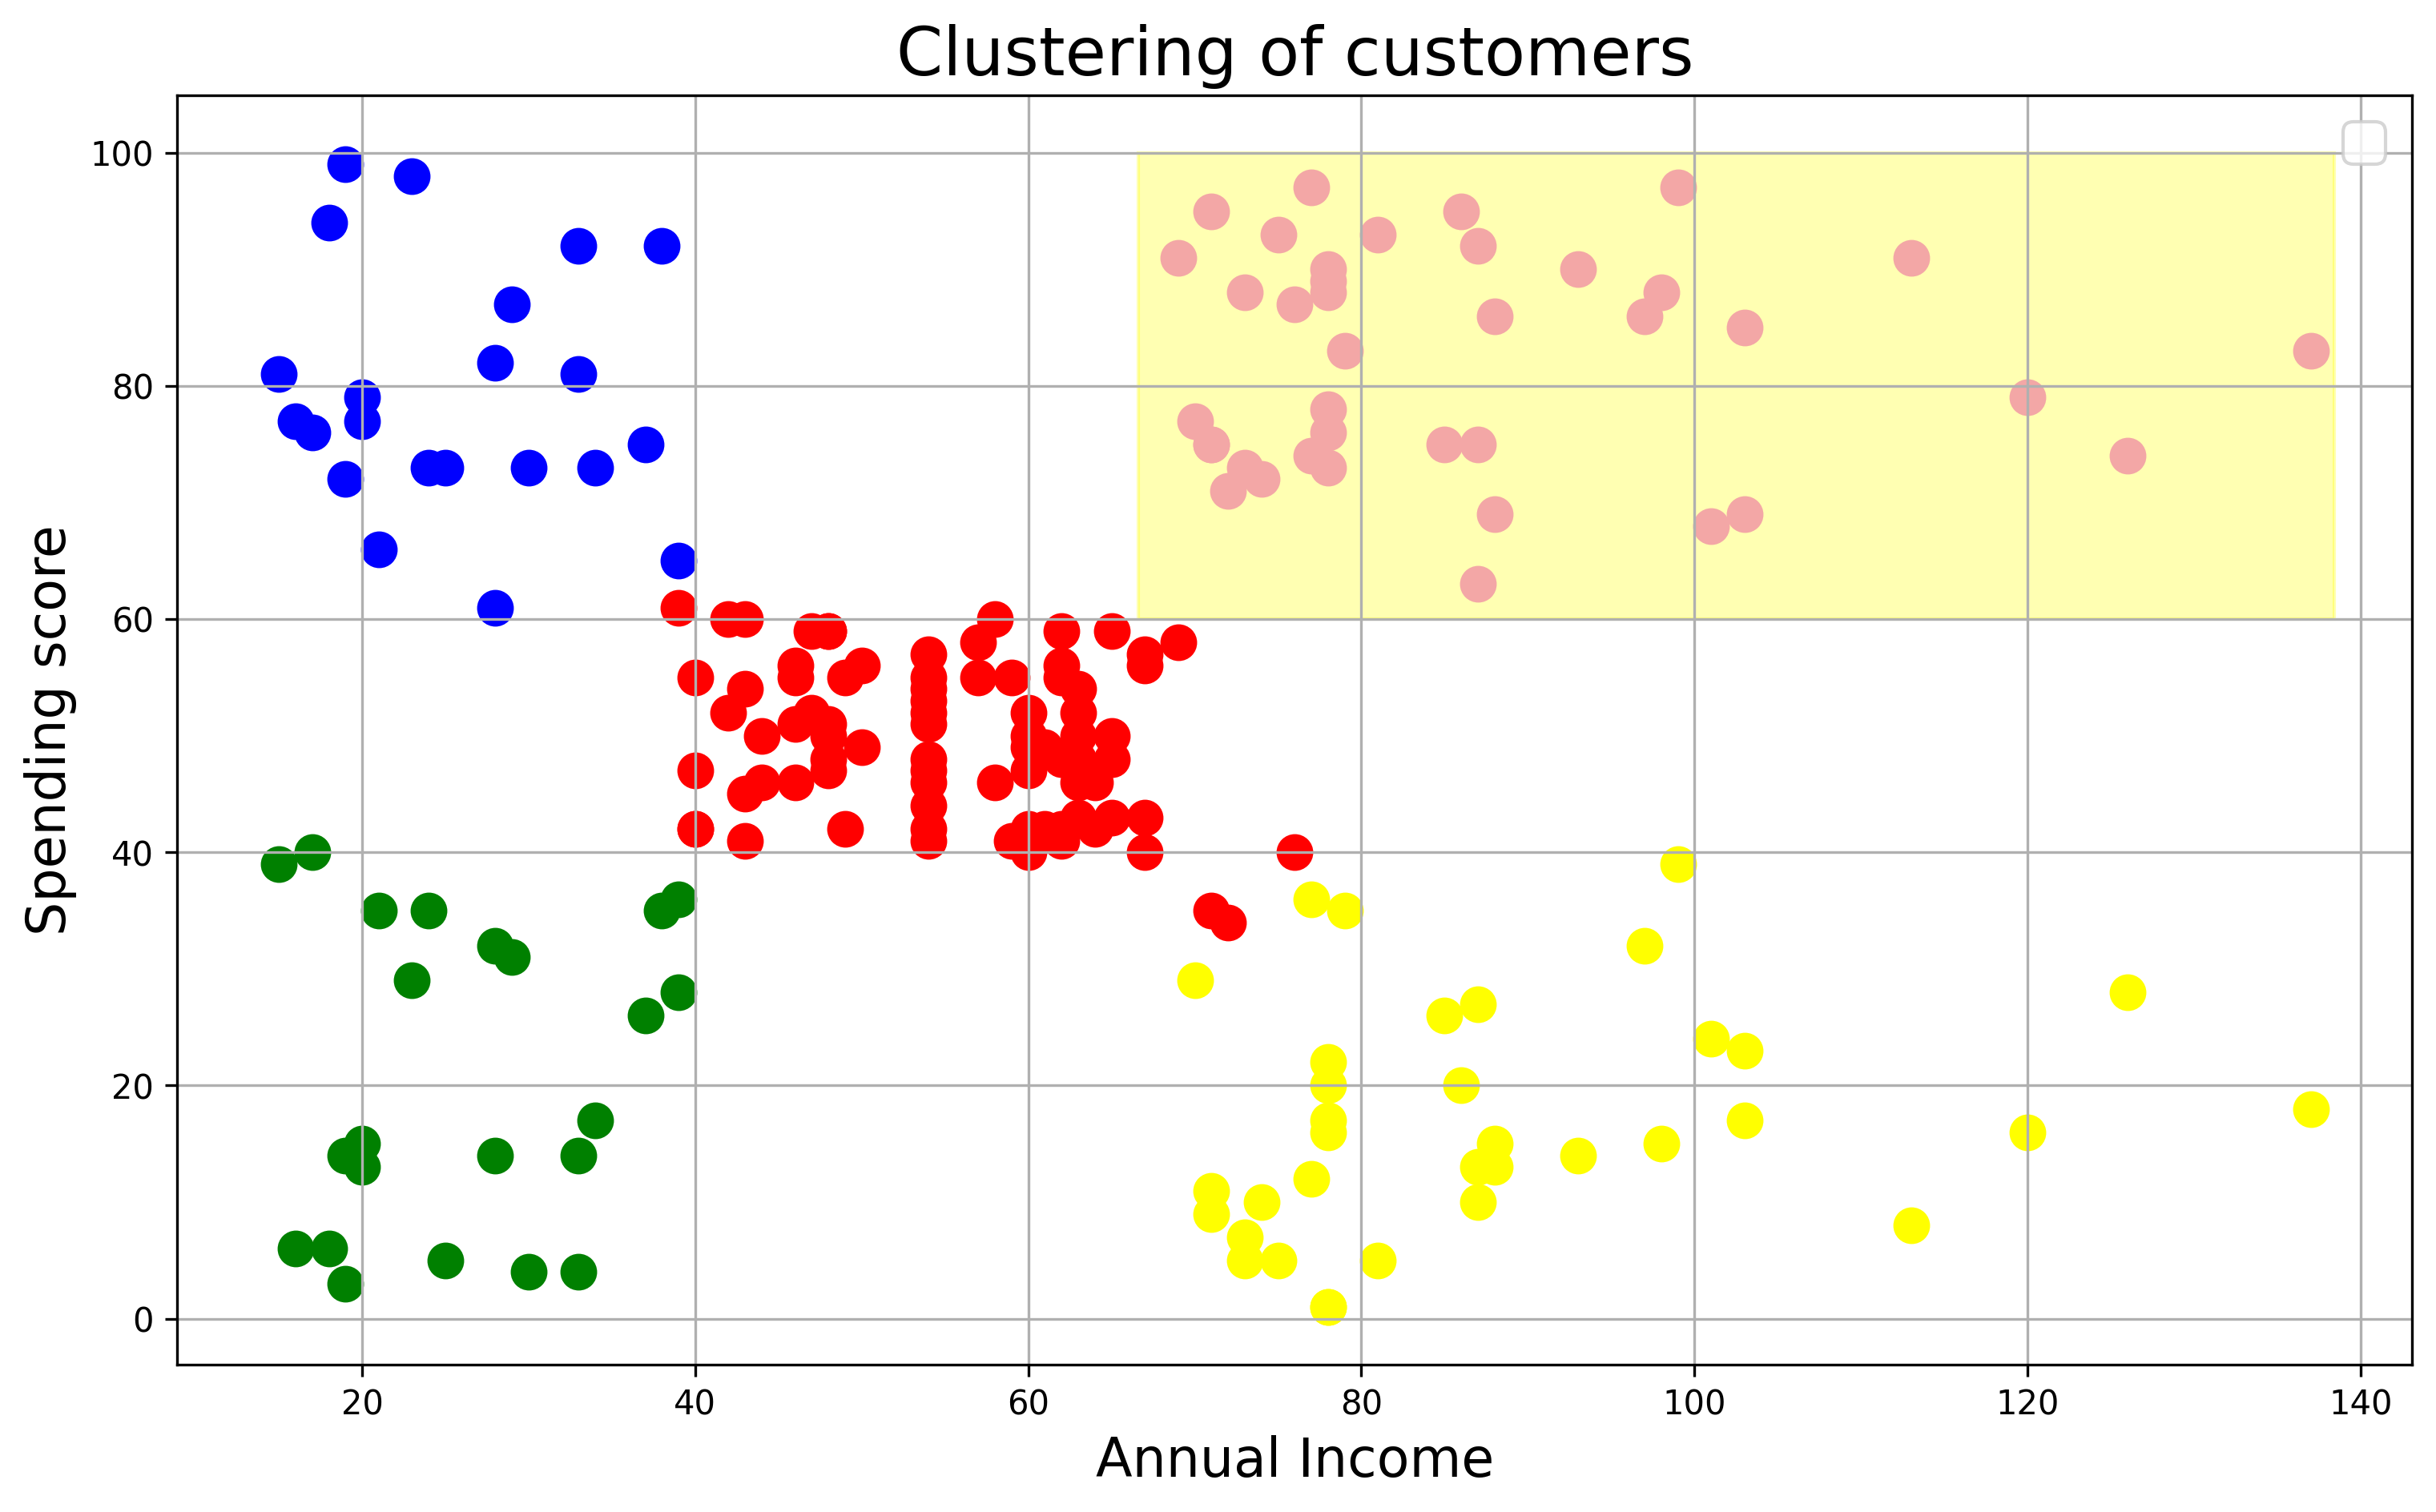

In [23]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=100, c='blue')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=100, c='red')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=100, c='violet')
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s=100, c='green')
plt.scatter(X[y_km == 4, 0], X[y_km == 4, 1], s=100, c='yellow')

plt.title("Clustering of customers", fontsize=20)
plt.xlabel("Annual Income", fontsize=16)
plt.ylabel("Spending score", fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.axhspan(ymin=60, ymax=100, xmin=0.43, xmax=0.965, alpha=0.3, color="yellow")

plt.show()

#### Yellow background part is our Target group

# **Final Words**
#### Thats it, we did clustering using Hierarchical and KMeans clustering.
#### If you found this good and helpful, please **upvote** and please do **comments**, **suggestions for improvement is always welcome**.
#### **Thank you**